In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size":20})

In [56]:
data = pd.read_csv("benchmark_log.csv", skipinitialspace=True, quotechar="\"")
data = data.ffill(axis = 1)

data

,model_name,N,repeat,start_train,final_train,valid_ids,start_valid,final_valid,1,2,...,91,92,93,94,95,96,97,98,99,100
0,Cell Cycle Transcription by Coupled CDK and Ne...,9,0,48.75,72.0,"3, 9, 12, 15, 18, 21, 31, 41, 45, 47, 53, 58, ...",13.125,18.0,56.5,56.5,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
1,Cell Cycle Transcription by Coupled CDK and Ne...,9,1,26.75,72.0,"1, 10, 11, 20, 23, 28, 44, 51, 54, 56, 58, 66,...",6.125,18.0,64.5,68.5,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
2,Cell Cycle Transcription by Coupled CDK and Ne...,9,2,7.0,72.0,"1, 4, 5, 6, 13, 15, 16, 19, 27, 30, 32, 38, 40...",0.0,18.0,26.0,26.75,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
3,Cell Cycle Transcription by Coupled CDK and Ne...,9,3,23.1875,72.0,"1, 9, 11, 17, 19, 25, 26, 29, 31, 38, 42, 47, ...",4.5,18.0,57.75,59.5,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
4,Cell Cycle Transcription by Coupled CDK and Ne...,9,4,38.0,72.0,"7, 8, 9, 15, 17, 19, 29, 35, 48, 56, 59, 64, 6...",4.0,18.0,56.5,56.5,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,FGF pathway of Drosophila Signalling Pathways,23,0,122.0,184.0,"19, 26, 27, 31, 36, 37, 40, 45, 51, 52, 53, 54...",36.0,46.0,147.0,148.0,...,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0
71,FGF pathway of Drosophila Signalling Pathways,23,1,154.0,184.0,"5, 10, 11, 16, 18, 30, 31, 34, 41, 44, 59, 70,...",38.0,46.0,164.0,169.0,...,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0
72,FGF pathway of Drosophila Signalling Pathways,23,2,140.0,184.0,"8, 9, 15, 17, 26, 27, 33, 39, 43, 44, 48, 57, ...",29.0,46.0,154.0,157.0,...,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0
73,FGF pathway of Drosophila Signalling Pathways,23,3,154.0,184.0,"2, 3, 5, 11, 14, 28, 29, 37, 47, 53, 66, 67, 7...",37.0,46.0,161.0,163.0,...,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0,184.0


In [57]:
start_end = data.groupby("model_name").agg({"N": "first",
                                            "start_train":["mean","std"],
                                            "final_train":["mean","std"],
                                            "start_valid":["mean","std"],
                                            "final_valid":["mean","std"]}).reset_index()

start_end.columns = pd.MultiIndex.from_tuples(
    [
        ( "name",      "",     "",     ""),
        (    "N",      "",     "",     ""),
        ("train", "start", "mean","score"),
        ("train", "start",  "std","score"),
        ("train", "final", "mean","score"),
        ("train", "final",  "std","score"),
        ("valid", "start", "mean","score"),
        ("valid", "start",  "std","score"),
        ("valid", "final", "mean","score"),
        ("valid", "final",  "std","score"),
    ],
)

start_end.insert(loc=start_end.columns.get_loc(("train","start","mean","score"))+1,
                 column = ("train","start","mean","per"),
                 value = start_end[("train","start","mean","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("train","start","std","score"))+1,
                 column = ("train","start","std","per"),
                 value = start_end[("train","start","std","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("train","final","mean","score"))+1,
                 column = ("train","final","mean","per"),
                 value = start_end[("train","final","mean","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("train","final","std","score"))+1,
                 column = ("train","final","std","per"),
                 value = start_end[("train","final","std","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","start","mean","score"))+1,
                 column = ("valid","start","mean","per"),
                 value = start_end[("valid","start","mean","score")]/(start_end["N"]*2)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","start","std","score"))+1,
                 column = ("valid","start","std","per"),
                 value = start_end[("valid","start","std","score")]/(start_end["N"]*2)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","final","mean","score"))+1,
                 column = ("valid","final","mean","per"),
                 value = start_end[("valid","final","mean","score")]/(start_end["N"]*2)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","final","std","score"))+1,
                 column = ("valid","final","std","per"),
                 value = start_end[("valid","final","std","score")]/(start_end["N"]*2)*100)

start_end.to_csv("benchmarks_start_end.csv")

start_end



name   N       train  \
                                                                start   
                                                                 mean   
                                                                score   
0                     Arabidopsis thaliana Cell Cycle  14       15.35   
1                    Aurora Kinase A in Neuroblastoma  23   71.366667   
2                              B cell differentiation  22    77.84037   
3       BT474 Breast Cell Line Long-term ErbB Network  24   95.825943   
4      BT474 Breast Cell Line Short-term ErbB Network  16   63.867178   
5                            Budding Yeast Cell Cycle  20       97.15   
6                       Budding Yeast Cell Cycle 2009  18   34.076521   
7          CD4+ T Cell Differentiation and Plasticity  18    60.36627   
8                                 Cardiac development  15        80.8   
9   Cell Cycle Transcription by Coupled CDK and Ne...   9     28.7375   
10                          Cortical Area Development   5        29.9   
11                           Death Receptor Signaling  28  114.038889   
12                                    FA BRCA pathway  28   66.866667   
13      FGF pathway of Drosophila Signalling Pathways  23       147.0   
14             Fanconi anemia and checkpoint recovery  15        46.2   

                                                                      \
                                          final                        
                     std                   mean                  std   
          per      score        per       score        per     score   
0   13.705357  12.645871  11.290956  104.216667  93.050595  2.454163   
1   38.786232  31.227080  16.971239      180.65  98.179348  3.533766   
2   44.227483  20.803030  11.819903  174.733333  99.280303  2.314207   
3   49.909346  26.453068  13.777639  191.036889   99.49838  1.465770   
4   49.896233  12.633009   9.869538       128.0      100.0  0.000000   
5    60.71875  18.207180  11.379487  158.966667  99.354167  1.293144   
6   23.664251  27.980142  19.430654  133.700832    92.8478  6.688229   
7   41.921021   8.324448   5.780867  138.704648  96.322672  2.435450   
8   67.333333   6.833740   5.694783       120.0      100.0  0.000000   
9   39.913194  15.760438  21.889497        72.0      100.0  0.000000   
10      74.75   4.485083  11.212708        39.8       99.5  0.447214   
11  50.910218  27.676396  12.355534      217.35   97.03125  9.193597   
12   29.85119  37.925461   16.93101       211.1  94.241071  6.496099   
13  79.891304  16.552945   8.996166       184.0      100.0  0.000000   
14       38.5   9.021935   7.518279       115.8       96.5  3.012474   

                  valid                                                        \
                  start                                      final              
                   mean                  std                  mean              
         per      score        per     score        per      score        per   
0   2.191217        2.1        7.5  2.247221   8.025788  24.483333  87.440476   
1   1.920525       17.0  36.956522  9.239859  20.086651  43.983333  95.615942   
2   1.314891  19.676111  44.718434  6.602494  15.005667       43.3  98.409091   
3   0.763422  24.253533  50.528193  3.092025   6.441719   45.69824  95.204666   
4        0.0  14.760809  46.127528  5.596028  17.487588  30.859913  96.437229   
5   0.808215  22.058333  55.145833  7.371562  18.428906       38.0       95.0   
6   4.644603   6.751587  18.754409  6.165944  17.127621  30.330498  84.251383   
7   1.691285  15.880556  44.112654  4.700046  13.055683  30.416214  84.489482   
8        0.0       21.6       72.0  3.781534  12.605114       29.3  97.666667   
9        0.0       5.55  30.833333  4.796320  26.646223       18.0      100.0   
10  1.118034   7.333333  73.333333  1.322876  13.228757        9.3       93.0   
11  4.104284  24.294444  43.382937  8.722877  15.576566  54.122222  96.646825

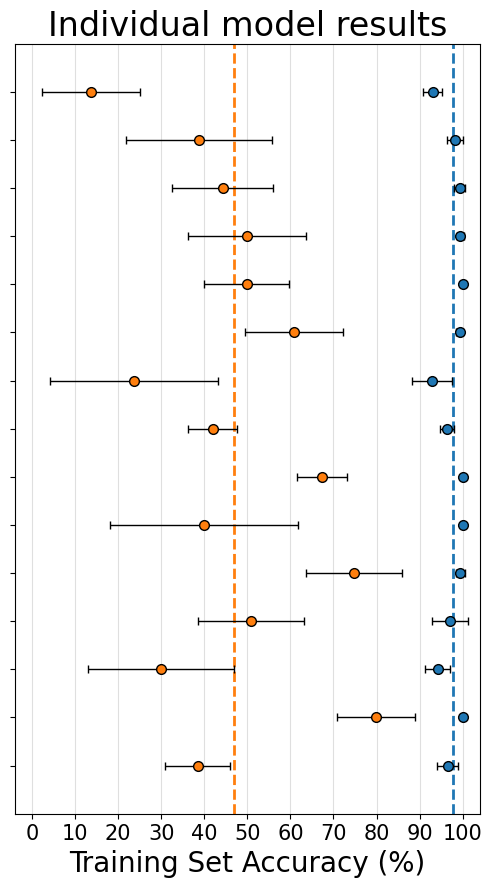

In [60]:
A_data = start_end
A_data.sort_values(by=["name"])
A_data.reset_index(inplace=True, drop=True)

fig = plt.figure(figsize =(6, 10))
ax = fig.add_subplot(111)

y = list(reversed(range(len(A_data))))

ax.errorbar(A_data[("train","final","mean","per")], y, xerr=A_data[("train","final","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)
ax.errorbar(A_data[("train","start","mean","per")], y, xerr=A_data[("train","start","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)

ax.set(xlim=(-4, 104), xticks=np.arange(0, 105, 10),
       ylim=(-1, len(A_data)), yticks=np.arange(0, len(A_data), 1))
     
ax.set_yticklabels([])
ax.set_xticklabels(labels=np.arange(0, 105, 10), fontsize=15)
ax.set_xlabel("Training Set Accuracy (%)")

ax.vlines(A_data[("train","final","mean","per")].mean(),-1,len(A_data),linestyles="dashed",colors="#1f77b4",linewidths=2)
ax.vlines(A_data[("train","start","mean","per")].mean(),-1,len(A_data),linestyles="dashed",colors="#ff7f0e",linewidths=2)
ax.grid(axis='x', alpha=0.4)

plt.title("Individual model results")
     
# show plot
plt.show()

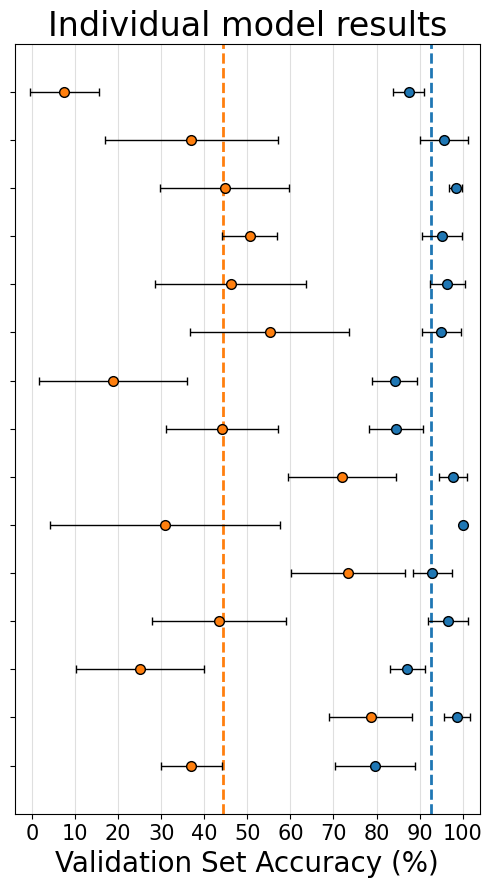

In [61]:
C_data = start_end
C_data.sort_values(by=["name"])
C_data.reset_index(inplace=True, drop=True)

fig = plt.figure(figsize =(6, 10))
ax = fig.add_subplot(111)

y = list(reversed(range(len(A_data))))

ax.errorbar(A_data[("valid","final","mean","per")], y, xerr=A_data[("valid","final","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)
ax.errorbar(A_data[("valid","start","mean","per")], y, xerr=A_data[("valid","start","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)

ax.set(xlim=(-4, 104), xticks=np.arange(0, 105, 10),
       ylim=(-1, len(C_data)), yticks=np.arange(0, len(C_data), 1))
     
ax.set_yticklabels([])
ax.set_xticklabels(labels=np.arange(0, 105, 10), fontsize=15)
ax.set_xlabel("Validation Set Accuracy (%)")

ax.vlines(C_data[("valid","final","mean","per")].mean(),-1,len(C_data),linestyles="dashed",colors="#1f77b4",linewidths=2)
ax.vlines(C_data[("valid","start","mean","per")].mean(),-1,len(C_data),linestyles="dashed",colors="#ff7f0e",linewidths=2)
ax.grid(axis='x', alpha=0.4)

plt.title("Individual model results")
     
# show plot
plt.show()

In [6]:
per_dict = {}

per_dict["start"] = data["start_train"]/(data["N"]*8)*100

for i in range(1,101):
    per_dict[f"{i}"] = data[f"{i}"]/(data["N"]*8)*100

per_df = pd.concat(per_dict.values(), axis=1)
per_df.columns = per_dict.keys()

per_df

,start,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,67.708333,78.472222,78.472222,90.277778,90.972222,93.055556,94.444444,94.444444,97.916667,97.916667,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,37.152778,89.583333,95.138889,95.138889,96.527778,96.527778,97.916667,99.305556,99.305556,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,9.722222,36.111111,37.152778,41.493056,44.270833,47.048611,81.944444,88.194444,88.541667,89.930556,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,32.204861,80.208333,82.638889,85.069444,88.541667,91.319444,91.319444,94.097222,94.097222,96.527778,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,52.777778,78.472222,78.472222,84.027778,86.805556,87.5,90.277778,95.138889,96.527778,99.305556,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,66.304348,79.891304,80.434783,88.043478,90.217391,94.565217,96.73913,98.913043,98.913043,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
71,83.695652,89.130435,91.847826,92.391304,92.934783,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
72,76.086957,83.695652,85.326087,90.76087,93.478261,94.021739,95.652174,96.73913,97.282609,97.826087,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
73,83.695652,87.5,88.586957,95.108696,95.108696,95.108696,97.282609,97.282609,97.282609,97.282609,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [7]:
averages = per_df.mean(axis=0)

stds = per_df.std(axis=0)

plot_data = pd.concat([averages, stds], axis=1)
plot_data.columns = ["average", "std"]

plot_data

,average,std
start,46.931861,21.330425
1,65.332558,15.317619
2,70.431036,12.998168
3,75.142211,12.117518
4,78.952604,11.536279
...,...,...
96,97.70096,3.185181
97,97.703374,3.184932
98,97.707365,3.180139
99,97.713923,3.174539


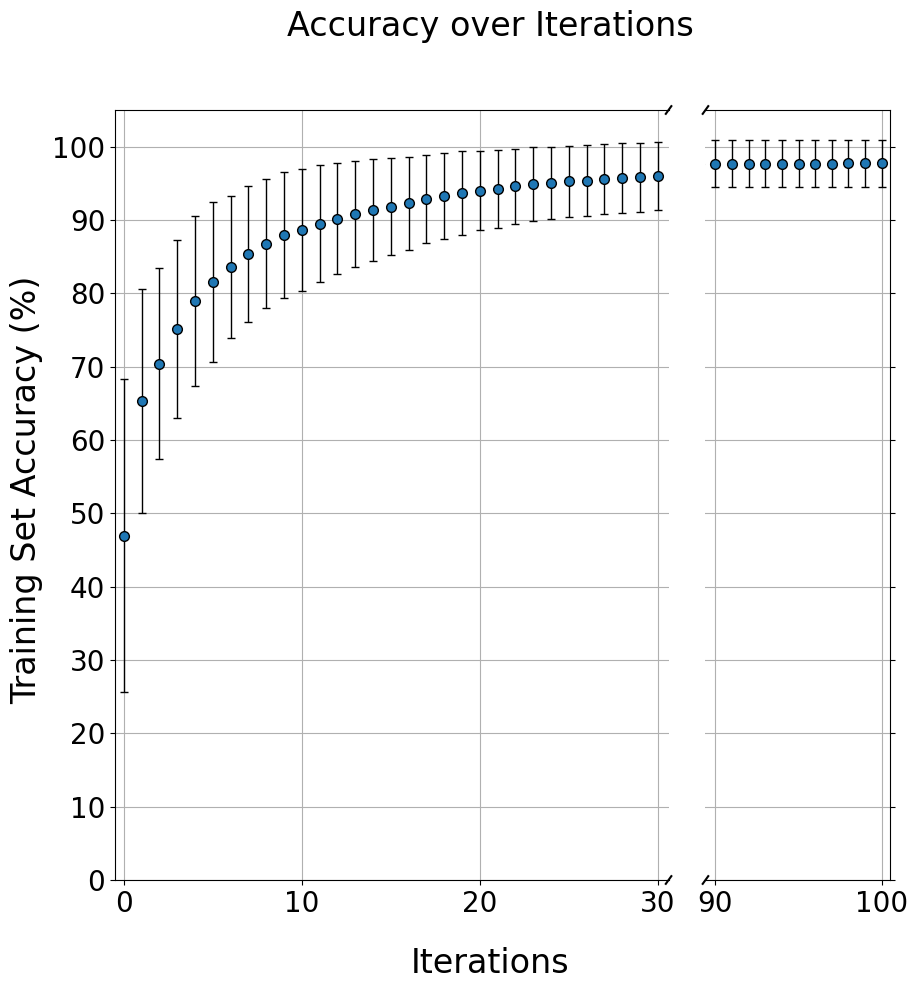

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3, 1], figsize=(10,10))

x = plot_data.index
y = plot_data["average"]
ax1.errorbar(x, y, yerr=plot_data["std"],
             fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", markersize=7)
ax2.errorbar(x, y, yerr=plot_data["std"],
             fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", markersize=7)

x1max = 30
x2min = 90
ymax = 105

ax1.set(xlim=(-0.5, x1max+0.6), xticks=np.arange(0, x1max+1, 10), xticklabels=[f"{i}" for i in range(0,x1max+1,10)],
        ylim=(0, ymax), yticks=np.arange(0, ymax+1, 10))

ax2.set(xlim=(x2min-0.6, 100.5), xticks=np.arange(x2min, 101, 10), xticklabels=[f"{i}" for i in range(x2min,101,10)],
        ylim=(0, ymax), yticks=np.arange(0, ymax+1, 10), yticklabels=[])

ax1.grid()
ax2.grid()

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = 0.005  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-3*d, +3*d), (1-d, 1+d), **kwargs)
ax2.plot((-3*d, +3*d), (-d, +d), **kwargs)


fig.subplots_adjust(wspace=0.1)

fig.suptitle("Accuracy over Iterations")
fig.supxlabel("Iterations")
fig.supylabel("Training Set Accuracy (%)")

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

<module 'matplotlib.pyplot' from 'c:\\Users\\danie\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

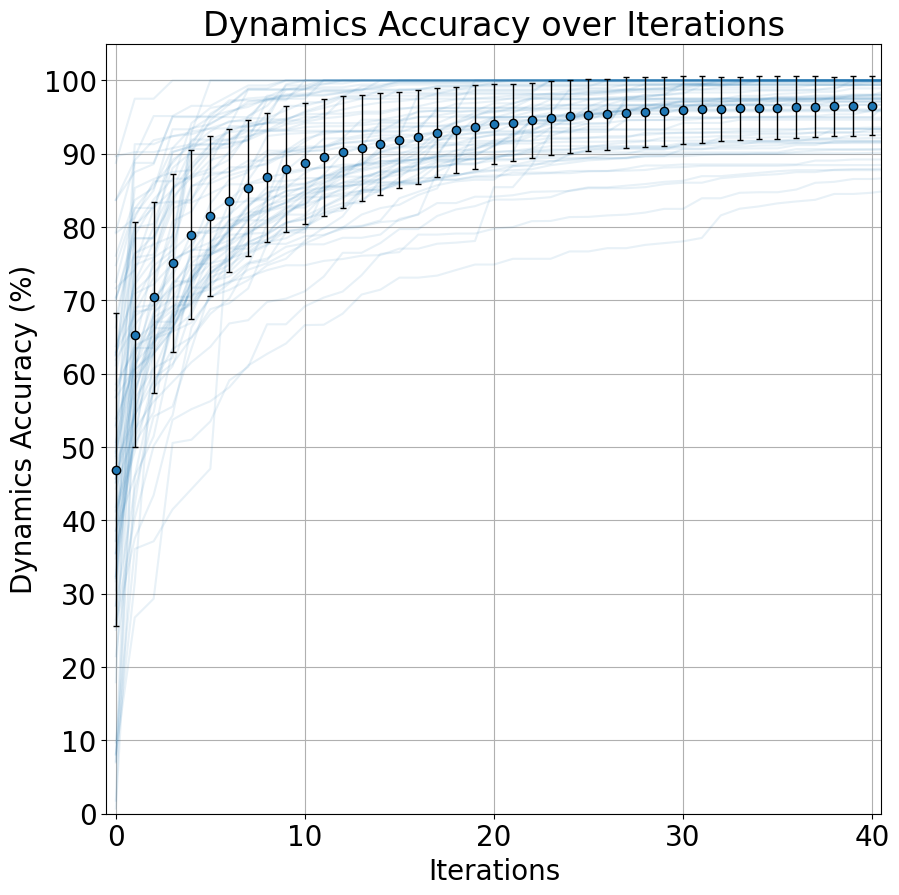

In [9]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111)

x = plot_data.index
y = plot_data["average"]
ax.errorbar(x, y, yerr=plot_data["std"], fmt="o", ecolor="k", linewidth=1, capsize=2, markeredgecolor="k", zorder=10)
for i in range(len(per_df.index)):
    ax.plot(per_df.columns, per_df.iloc[i], color="#1f77b4", alpha=0.1)

xmax = 40.5
ymax = 105

ax.set(xlim=(-0.5, xmax), ylim=(0, ymax))
ax.set_xlabel("Iterations")
ax.set_ylabel("Dynamics Accuracy (%)")

plt.title("Dynamics Accuracy over Iterations")
plt.yticks(np.arange(0, ymax+1, 10))
plt.xticks(np.arange(0, xmax+1, 10), labels=[f"{i}" for i in range(0,int(xmax+1),10)])
plt.grid()

plt

In [10]:
per_avg_dict = {}

for i in range(0,110,3):
    per_avg_dict[f"{i}"] = per_df.loc[i:i+2,:].mean(axis=0)

per_avg_df = pd.concat(per_avg_dict, axis=1)
per_avg_df = per_avg_df.transpose()
# per_avg_df.columns = per_df.keys()

per_avg_df

,start,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,38.194444,68.055556,70.25463,75.636574,77.256944,78.877315,91.435185,93.981481,95.25463,95.949074,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,57.91088,85.393519,86.203704,89.699074,91.782407,92.939815,93.865741,96.412037,96.875,98.611111,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
6,73.75,80.729167,83.541667,87.916667,90.972222,93.333333,95.138889,97.5,98.333333,98.333333,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,24.22619,66.281622,68.43564,71.547619,78.828125,80.372024,81.834077,83.292411,83.546627,84.761905,...,93.239087,93.239087,93.239087,93.239087,93.239087,93.239087,93.239087,93.239087,93.239087,93.239087
12,19.866071,43.080357,60.168651,62.607474,69.642857,74.962798,77.207341,78.869048,80.233135,81.175595,...,94.345238,94.345238,94.345238,94.345238,94.345238,94.345238,94.345238,94.345238,94.345238,94.345238
15,49.184783,81.672705,83.650362,86.322464,88.707729,90.247585,91.108092,91.666667,92.225242,93.176329,...,97.237319,97.237319,97.237319,97.237319,97.237319,97.237319,97.237319,97.237319,97.237319,97.327899
18,26.159695,65.89738,72.538994,79.948077,88.642082,90.564842,91.516615,91.686109,92.369163,93.09929,...,98.62758,98.62758,98.62758,98.62758,98.62758,98.62758,98.62758,98.62758,98.62758,98.62758
21,42.180135,62.634975,70.430745,78.837945,86.246142,89.756944,91.631944,92.27904,95.830177,96.556187,...,99.621212,99.621212,99.621212,99.621212,99.621212,99.810606,99.810606,99.810606,99.810606,99.810606
24,51.028077,64.664867,69.388819,71.669253,78.439818,80.65002,82.497254,84.22807,85.267356,86.66489,...,99.776786,99.776786,99.776786,99.776786,99.776786,99.776786,99.776786,99.776786,99.776786,99.776786
27,52.985746,63.700479,70.199813,72.569865,75.192321,78.83486,80.2853,82.561359,84.024909,87.411294,...,99.387181,99.387181,99.387181,99.387181,99.387181,99.387181,99.387181,99.387181,99.387181,99.387181


<module 'matplotlib.pyplot' from 'c:\\Users\\danie\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

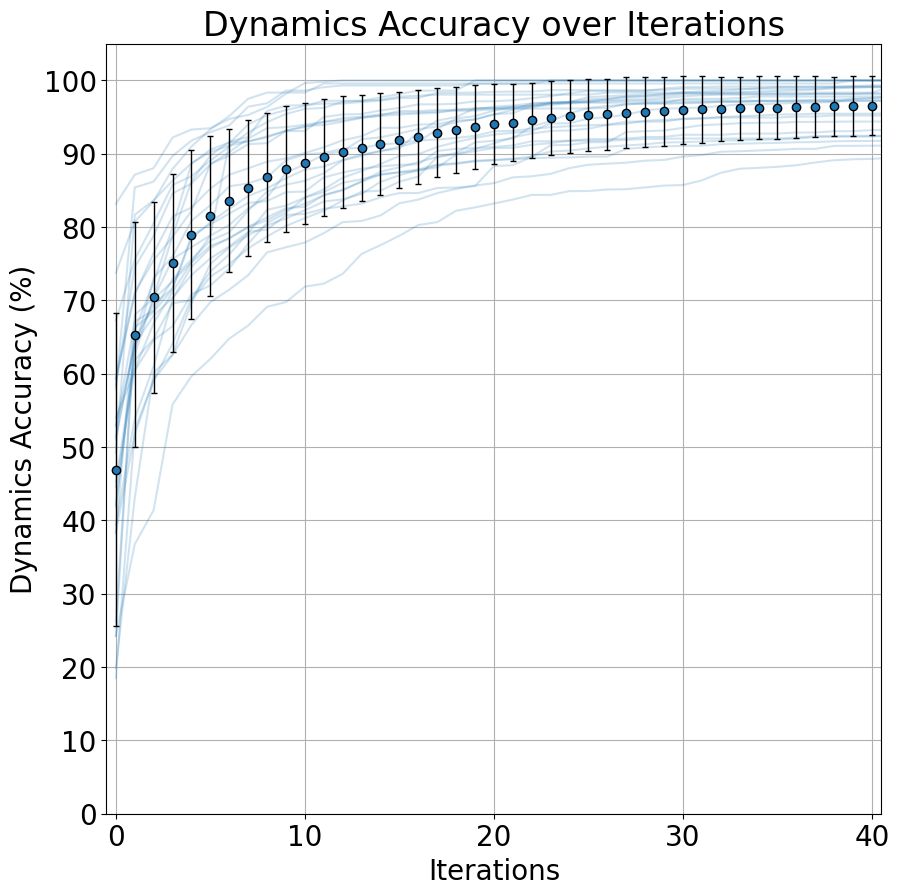

In [11]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111)

x = plot_data.index
y = plot_data["average"]
ax.errorbar(x, y, yerr=plot_data["std"], fmt="o", ecolor="k", linewidth=1, capsize=2, markeredgecolor="k", zorder=10)
for i in range(len(per_avg_df.index)):
    ax.plot(per_avg_df.columns, per_avg_df.iloc[i], color="#1f77b4", alpha=0.2)

xmax = 40.5
ymax = 105

ax.set(xlim=(-0.5, xmax), ylim=(0, ymax))
ax.set_xlabel("Iterations")
ax.set_ylabel("Dynamics Accuracy (%)")

plt.title("Dynamics Accuracy over Iterations")
plt.yticks(np.arange(0, ymax+1, 10))
plt.xticks(np.arange(0, xmax+1, 10), labels=[f"{i}" for i in range(0,int(xmax+1),10)])
plt.grid()

plt